<a href="https://colab.research.google.com/github/psyuktha/insurance/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[:5], y_train[:5],len(X_train_normal[0])

(array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
 Name: charges, dtype: float64,
 11)

In [ ]:
df=pd.DataFrame(X_train_normal)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pd.DataFrame(y_train)

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [ ]:
tf.random.set_seed(42)

insurance_model =tf.keras.Sequential([

    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics = ["mae"])

history=insurance_model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=500,verbose=0)


In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8649.7061 - mae: 8649.7061


[8649.7060546875, 8649.7060546875]

Text(0.5, 0, 'Epochs')

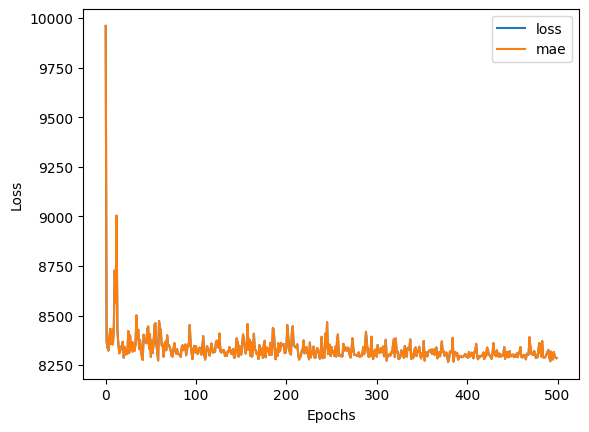

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')